# Definición de funciones

## Importación de librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import numpy as np
import datetime
from dateutil.relativedelta import relativedelta
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsRegressor as KNNR

## Función limpieza data

In [2]:
def cleaning(data):
    #Property Type
    luxury = ['Treehouse','Villa','Timeshare','Castle','Tipi','Boat','Loft','Vacation home']
    low = ['Cabin','Bed & Breakfast','Yurt','Camper/RV','Hut','Tent','Hostel','Dorm']
    other = ['Guest suite','In-law','Boutique hotel','Serviced apartment','Chalet','Cave','Earth House','Train']
    data.property_type = data.property_type.apply(lambda x : 'Luxury' if x in luxury else x)\
                                               .apply(lambda x : 'Low' if x in low else x)\
                                               .apply(lambda x : 'Other' if x in other else x)
    air_prop_type = pd.get_dummies(data.property_type, drop_first=True)
    data = pd.concat([data,air_prop_type],axis = 1)
    data.drop('property_type',axis = 1,inplace = True)
    
    #Room Type
    room_v_price = data.pivot_table(index = 'room_type', values = 'price', aggfunc = 'mean')
    entire = room_v_price.loc['Entire home/apt']/room_v_price.loc['Entire home/apt']
    private = room_v_price.loc['Private room']/room_v_price.loc['Entire home/apt']
    shared = room_v_price.loc['Shared room']/room_v_price.loc['Entire home/apt']    
    data.room_type = data.room_type.apply(lambda x : entire[0] if x == 'Entire home/apt' else x)\
                                           .apply(lambda x : private[0] if x == 'Private room' else x)\
                                           .apply(lambda x : shared[0] if x == 'Shared room' else x)
    
    #Amenities
    data.amenities = data.amenities.str.replace('"translation missing: en.hosting_amenity_49"','')\
                                 .str.replace('"translation missing: en.hosting_amenity_50"','').str.split(',')
    amen = pd.DataFrame(data.amenities.apply(lambda x : len(x)))
    amen.columns = ['amenity_items']
    data = pd.concat([data,amen],axis = 1)
    data.drop('amenities',axis = 1, inplace = True)
    
    #Bed Type
    data.drop('bed_type',axis = 1, inplace = True)
    
    #Cancellation Policy
    data.cancellation_policy = data.cancellation_policy.str.replace('super_strict_30','strict')\
                                 .str.replace('super_strict_60','strict')
    air_canc_pol = pd.get_dummies(data.cancellation_policy, drop_first=True)
    data = pd.concat([data,air_canc_pol],axis = 1)
    data.drop('cancellation_policy',axis = 1,inplace = True)
    
    #Cleaning Fee
    air_clean_fee = pd.get_dummies(data.cleaning_fee, drop_first=True)
    air_clean_fee.columns = ['clean_fee']
    data = pd.concat([data,air_clean_fee],axis = 1)
    data.drop('cleaning_fee',axis = 1,inplace = True)
    
    #City
    air_city = pd.get_dummies(data.city, drop_first=True)
    data = pd.concat([data,air_city],axis = 1)
    data.drop('city',axis = 1,inplace = True)
    
    #Description
    data.drop('description',axis = 1, inplace = True)
    
    #Columnas de fechas
    data['today'] = pd.Timestamp.today()
    data['delta_first'] = (data.today - pd.to_datetime(data.first_review) )/np.timedelta64(1,'Y')
    data['delta_last'] = (data.today - pd.to_datetime(data.last_review) )/np.timedelta64(1,'Y')
    data['delta_host'] = (data.today - pd.to_datetime(data.host_since) )/np.timedelta64(1,'Y')
    data.drop(['first_review','host_since','last_review','today'],axis = 1, inplace = True)
    
    #Host Response Rate
    data.host_response_rate = data.host_response_rate.apply(lambda x : float(x.split('%')[0])/100)
    
    #Profile Pic
    data.drop('host_has_profile_pic',axis = 1, inplace = True)
    
    #Identity Verified
    air_verified = pd.get_dummies(data.host_identity_verified, drop_first = True)
    air_verified.columns = ['verified']
    data = pd.concat([data,air_verified],axis = 1)
    data.drop('host_identity_verified',axis = 1,inplace = True)
    
    #Instant Bookable
    air_instant = pd.get_dummies(data.instant_bookable, drop_first = True)
    air_instant.columns = ['instant']
    data = pd.concat([data,air_instant],axis = 1)
    data.drop('instant_bookable',axis = 1,inplace = True)
    
    #Columnas name, neighbourhood y thumbnail_url
    data.drop('name',axis = 1, inplace = True)
    data.drop('neighbourhood',axis = 1, inplace = True)
    data.drop('thumbnail_url',axis = 1, inplace = True)
    
    #Zipcode
    data.zipcode = data.zipcode.apply(lambda x : re.findall('^\d+',x)).apply(lambda x : pd.to_numeric(x[0]))
    return data

## Función limpieza submit

In [3]:
def cleaning_sub(data):
    #Property Type
    luxury = ['Treehouse','Villa','Timeshare','Castle','Tipi','Boat','Loft','Vacation home']
    low = ['Cabin','Bed & Breakfast','Yurt','Camper/RV','Hut','Tent','Hostel','Dorm']
    other = ['Guest suite','In-law','Boutique hotel','Serviced apartment','Chalet','Cave','Earth House','Train']
    data.property_type = data.property_type.apply(lambda x : 'Luxury' if x in luxury else x)\
                                               .apply(lambda x : 'Low' if x in low else x)\
                                               .apply(lambda x : 'Other' if x in other else x)
    air_prop_type = pd.get_dummies(data.property_type, drop_first=True)
    data = pd.concat([data,air_prop_type],axis = 1)
    data.drop('property_type',axis = 1,inplace = True)
    
    #Room Type
    entire = 198.166790/198.166790
    private = 81.995331/198.166790
    shared = 52.694215/198.166790    
    data.room_type = data.room_type.apply(lambda x : entire if x == 'Entire home/apt' else x)\
                                           .apply(lambda x : private if x == 'Private room' else x)\
                                           .apply(lambda x : shared if x == 'Shared room' else x)
    
    #Amenities
    data.amenities = data.amenities.str.replace('"translation missing: en.hosting_amenity_49"','')\
                                 .str.replace('"translation missing: en.hosting_amenity_50"','').str.split(',')
    amen = pd.DataFrame(data.amenities.apply(lambda x : len(x)))
    amen.columns = ['amenity_items']
    data = pd.concat([data,amen],axis = 1)
    data.drop('amenities',axis = 1, inplace = True)
    
    #Bed Type
    data.drop('bed_type',axis = 1, inplace = True)
    
    #Cancellation Policy
    data.cancellation_policy = data.cancellation_policy.str.replace('super_strict_30','strict')\
                                 .str.replace('super_strict_60','strict')
    air_canc_pol = pd.get_dummies(data.cancellation_policy, drop_first=True)
    data = pd.concat([data,air_canc_pol],axis = 1)
    data.drop('cancellation_policy',axis = 1,inplace = True)
    
    #Cleaning Fee
    air_clean_fee = pd.get_dummies(data.cleaning_fee, drop_first=True)
    air_clean_fee.columns = ['clean_fee']
    data = pd.concat([data,air_clean_fee],axis = 1)
    data.drop('cleaning_fee',axis = 1,inplace = True)
    
    #City
    air_city = pd.get_dummies(data.city, drop_first=True)
    data = pd.concat([data,air_city],axis = 1)
    data.drop('city',axis = 1,inplace = True)
    
    #Description
    data.drop('description',axis = 1, inplace = True)
    
    #Columnas de fechas
    data['today'] = pd.Timestamp.today()
    data['delta_first'] = (data.today - pd.to_datetime(data.first_review) )/np.timedelta64(1,'Y')
    data['delta_last'] = (data.today - pd.to_datetime(data.last_review) )/np.timedelta64(1,'Y')
    data['delta_host'] = (data.today - pd.to_datetime(data.host_since) )/np.timedelta64(1,'Y')
    data.drop(['first_review','host_since','last_review','today','id'],axis = 1, inplace = True)
    
    #Host Response Rate
    data.host_response_rate = data.host_response_rate.apply(lambda x : float(x.split('%')[0])/100)
    
    #Profile Pic
    data.drop('host_has_profile_pic',axis = 1, inplace = True)
    
    #Identity Verified
    air_verified = pd.get_dummies(data.host_identity_verified, drop_first = True)
    air_verified.columns = ['verified']
    data = pd.concat([data,air_verified],axis = 1)
    data.drop('host_identity_verified',axis = 1,inplace = True)
    
    #Instant Bookable
    air_instant = pd.get_dummies(data.instant_bookable, drop_first = True)
    air_instant.columns = ['instant']
    data = pd.concat([data,air_instant],axis = 1)
    data.drop('instant_bookable',axis = 1,inplace = True)
    
    #Columnas name, neighbourhood y thumbnail_url
    data.drop('name',axis = 1, inplace = True)
    data.drop('neighbourhood',axis = 1, inplace = True)
    data.drop('thumbnail_url',axis = 1, inplace = True)
    
    #Zipcode
    data.zipcode = data.zipcode.apply(lambda x : re.findall('^\d+',x)).apply(lambda x : pd.to_numeric(x[0]))
    return data

### Importación de datos

In [4]:
data = pd.read_csv('airbnb_data.csv')

In [5]:
data = cleaning(data)

In [6]:
data.shape

(28877, 34)

In [7]:
datacorr = data.corr()

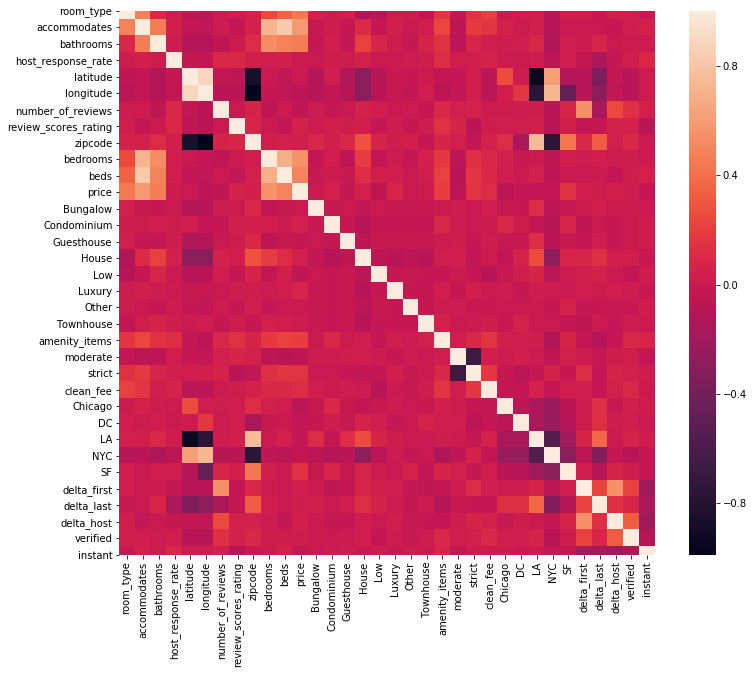

In [8]:
plt.figure(figsize=(12,10))
sns.heatmap(datacorr);

#### Definición de columnas para ML

In [9]:
X_air = data.drop(['price'],axis = 1)
#,'latitude','longitude','zipcode','delta_first','delta_last','moderate','strict','verified','instant','accommodates','amenity_items','host_response_rate','clean_fee'
y_air = data.price

In [10]:
X_air_train, X_air_test, y_air_train, y_air_test = train_test_split(X_air, y_air, test_size = 0.25)

### Modelo Random Forests con 33 columnas

In [11]:
rfr = RFR().fit(X_air_train,y_air_train)
y_pred = rfr.predict(X_air_test)

/Users/eghm/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [12]:
mse(y_air_test, y_pred)

6410.056182825486

In [13]:
rmse_t=mse(y_air_test, y_pred)**0.5
rmse_t

80.0628264728737

### Importación de submission

In [14]:
airsub = pd.read_csv('airbnb_submission.csv')
airsub.head()

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,0,House,Entire home/apt,"{TV,""Wireless Internet"",Pool,Kitchen,""Free par...",8,3.5,Real Bed,strict,True,LA,...,33.880809,-118.387797,"Luxury 4BR/3,5Bath House-Manhattan Beach",Manhattan Beach,5,96.0,https://a0.muscache.com/im/pictures/d2e0d3f3-9...,90266,4.0,4.0
1,1,Apartment,Entire home/apt,"{""Wireless Internet"",""Smoke detector"",""Carbon ...",2,1.0,Real Bed,flexible,True,LA,...,33.864526,-118.387020,Ocean View Efficiency,Hermosa Beach,11,96.0,https://a0.muscache.com/im/pictures/9475cd65-3...,90254,0.0,1.0
2,2,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",11,1.0,Real Bed,strict,True,Boston,...,42.379616,-71.028836,"Spacious 4BR Near Airport, Subway, Beach + City",East Boston,29,85.0,https://a0.muscache.com/im/pictures/31470a85-3...,02128,4.0,4.0
3,3,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",3,1.0,Real Bed,flexible,True,LA,...,34.048905,-118.465482,Perfect Location / Brentwood,Brentwood,50,98.0,https://a0.muscache.com/im/pictures/93730358/e...,90049,1.0,1.0
4,4,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0,Real Bed,strict,True,DC,...,38.894259,-76.996380,The Barbara of Capitol Hill,Capitol Hill,61,96.0,https://a0.muscache.com/im/pictures/f390c032-5...,20002,2.0,2.0


In [15]:
sub = cleaning_sub(airsub)
sub

,room_type,accommodates,bathrooms,host_response_rate,latitude,longitude,number_of_reviews,review_scores_rating,zipcode,bedrooms,...,Chicago,DC,LA,NYC,SF,delta_first,delta_last,delta_host,verified,instant
0,1.000000,8,3.5,1.0,33.880809,-118.387797,5,96.0,90266,4.0,...,0,0,1,0,0,3.195221,2.639425,5.007715,1,0
1,1.000000,2,1.0,1.0,33.864526,-118.387020,11,96.0,90254,0.0,...,0,0,1,0,0,2.787272,2.595619,5.412925,1,1
2,1.000000,11,1.0,1.0,42.379616,-71.028836,29,85.0,2128,4.0,...,0,0,0,0,0,2.713349,2.182195,3.488177,1,1
3,1.000000,3,1.0,1.0,34.048905,-118.465482,50,98.0,90049,1.0,...,0,0,1,0,0,4.358831,2.603833,4.791420,1,0
4,1.000000,4,1.0,1.0,38.894259,-76.996380,61,96.0,20002,2.0,...,0,1,0,0,0,4.068613,2.592881,5.998837,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9620,0.413769,4,1.0,1.0,40.697452,-73.930380,9,100.0,11221,1.0,...,0,0,0,1,0,2.614784,2.269808,5.426615,1,0
9621,1.000000,5,2.0,1.0,33.871279,-118.395163,9,98.0,90254,3.0,...,0,0,1,0,0,6.343814,3.192483,10.100222,0,0
9622,1.000000,4,1.0,1.0,37.788529,-122.411818,1,100.0,94109,1.0,...,0,0,0,0,1,3.156890,3.156890,4.342404,1,0
9623,0.413769,2,1.0,1.0,34.049723,-118.379422,20,99.0,90035,1.0,...,0,0,1,0,0,4.068613,2.601095,7.187089,0,0


In [16]:
#sub = sub.drop(['id','latitude','longitude','zipcode','delta_first','delta_last','moderate','strict','verified',\
 #                 'instant','accommodates','amenity_items','host_response_rate'],axis = 1)

### Entrenamiento de Random Forest con todos los datos.

In [17]:
rfrfull = RFR().fit(X_air,y_air)
y_pred_sub = rfrfull.predict(sub)

/Users/eghm/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [18]:
subEGHMrfr = pd.DataFrame(range(len(y_pred_sub)))
subEGHMrfr.columns = ['id']
price = pd.DataFrame(y_pred_sub, columns = ['price'])
subEGHMrfr = subEGHMrfr.join(price)

In [19]:
#subEGHMrfr.to_csv('y_pred_EGHMrfr.csv', index = False)

In [20]:
rfr.feature_importances_

array([6.65847135e-02, 3.86468164e-02, 1.85102388e-01, 8.39546617e-03,
       6.07385314e-02, 9.09675875e-02, 2.48368425e-02, 2.07249308e-02,
       6.61641042e-02, 2.70255508e-01, 1.14009994e-02, 3.86392364e-05,
       1.41190515e-03, 1.07203682e-04, 3.04093021e-03, 2.32821556e-04,
       6.56714725e-03, 5.90215285e-04, 1.49253155e-03, 3.14239373e-02,
       2.12680038e-03, 4.22941760e-03, 3.62716678e-03, 2.29287010e-04,
       5.69798087e-04, 2.09019813e-04, 1.53679292e-03, 3.10891495e-04,
       2.62322840e-02, 3.91846368e-02, 2.75450021e-02, 2.31534921e-03,
       3.16033501e-03])

In [21]:
X_air_rfr_feature = X_air[[X_air.columns[0],X_air.columns[2],X_air.columns[4],X_air.columns[5]\
                                ,X_air.columns[8],X_air.columns[9]]]
X_air_rfr_feature

,room_type,bathrooms,latitude,longitude,zipcode,bedrooms
0,1.000000,1.0,40.766115,-73.989040,10019,3.0
1,0.413769,1.0,37.753164,-122.429526,94131,1.0
2,1.000000,1.0,34.046737,-118.260439,90015,1.0
3,0.413769,1.0,37.781128,-122.501095,94121,1.0
4,0.413769,1.0,40.723883,-73.983880,10009,1.0
...,...,...,...,...,...,...
28872,0.413769,1.0,40.740904,-74.002948,10011,1.0
28873,0.265908,3.0,34.199671,-118.618070,91307,1.0
28874,1.000000,1.0,37.789989,-122.407384,94108,1.0
28875,1.000000,2.0,33.871549,-118.396053,90254,2.0


In [22]:
X_air_train_rfr_feature, X_air_test_rfr_feature, y_air_train, y_air_test = train_test_split(X_air_rfr_feature, y_air, test_size = 0.25)

In [23]:
rfr_feat = RFR().fit(X_air_train_rfr_feature,y_air_train)
y_pred_feat = rfr_feat.predict(X_air_test_rfr_feature)

/Users/eghm/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [24]:
mse(y_air_test, y_pred_feat)

6807.976318559558

In [25]:
rmse_feat=mse(y_air_test, y_pred_feat)**0.5
rmse_feat

82.51046187338645

In [26]:
knnr = KNNR().fit(X_air_train,y_air_train)
y_pred_knnr = knnr.predict(X_air_test)

In [27]:
mse(y_air_test, y_pred_knnr)

19927.638963988924

In [28]:
rmse_knnr=mse(y_air_test, y_pred_knnr)**0.5
rmse_knnr

141.16528951547872

In [29]:
knnr_feat = KNNR().fit(X_air_train_rfr_feature,y_air_train)
y_pred_knnr_feat = knnr_feat.predict(X_air_test_rfr_feature)

In [30]:
mse(y_air_test, y_pred_knnr_feat)

7179.638842105265

In [31]:
rmse_knnr_feat=mse(y_air_test, y_pred_knnr_feat)**0.5
rmse_knnr_feat

84.73274952522941